## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/kc_house_data.csv")
f = open('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
hd.loc[(hd['sqft_living']  <= 100)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,PRIVATE,2,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.745290,-121.92362
28816,2923099027,12/13/2021,205000.0,1,0.0,100,25400,1.0,YES,NO,...,NaN,100,0,0,140,1963,0,"49622 172nd Street Southeast, North Bend, Wash...",47.444745,-121.67879


In [5]:
hd.drop(index = 14977, inplace = True, axis = 0)

In [6]:
hd.loc[(hd['sqft_living']  <= 100)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
28816,2923099027,12/13/2021,205000.0,1,0.0,100,25400,1.0,YES,NO,...,NaN,100,0,0,140,1963,0,"49622 172nd Street Southeast, North Bend, Wash...",47.444745,-121.67879


In [7]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015400e+04,3.015400e+04,30154.000000,30154.000000,30154.000000,3.015400e+04,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000
mean,4.538203e+09,1.108513e+06,3.413511,2.334682,2112.494694,1.671332e+04,1.543477,1809.886052,476.055150,330.222060,217.419248,1975.162433,90.925317,47.328062,-121.317377
std,2.882584e+09,8.963916e+05,0.981623,0.889519,973.984715,6.035721e+04,0.567720,878.258989,579.634457,285.768986,245.303664,32.066807,416.479615,1.434027,5.725569
min,1.000055e+06,2.736000e+04,0.000000,0.000000,100.000000,4.020000e+02,1.000000,100.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064800e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326047
50%,3.874206e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551378,-122.225593
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.750000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669907,-122.116236
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [9]:
hd["price"].describe()

count    3.015400e+04
mean     1.108513e+06
std      8.963916e+05
min      2.736000e+04
25%      6.480000e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [11]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

#convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

#remove duplicate rows
hd = hd.drop_duplicates(subset=["id"])

# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["years_old"] = 2023-hd["yr_built"]

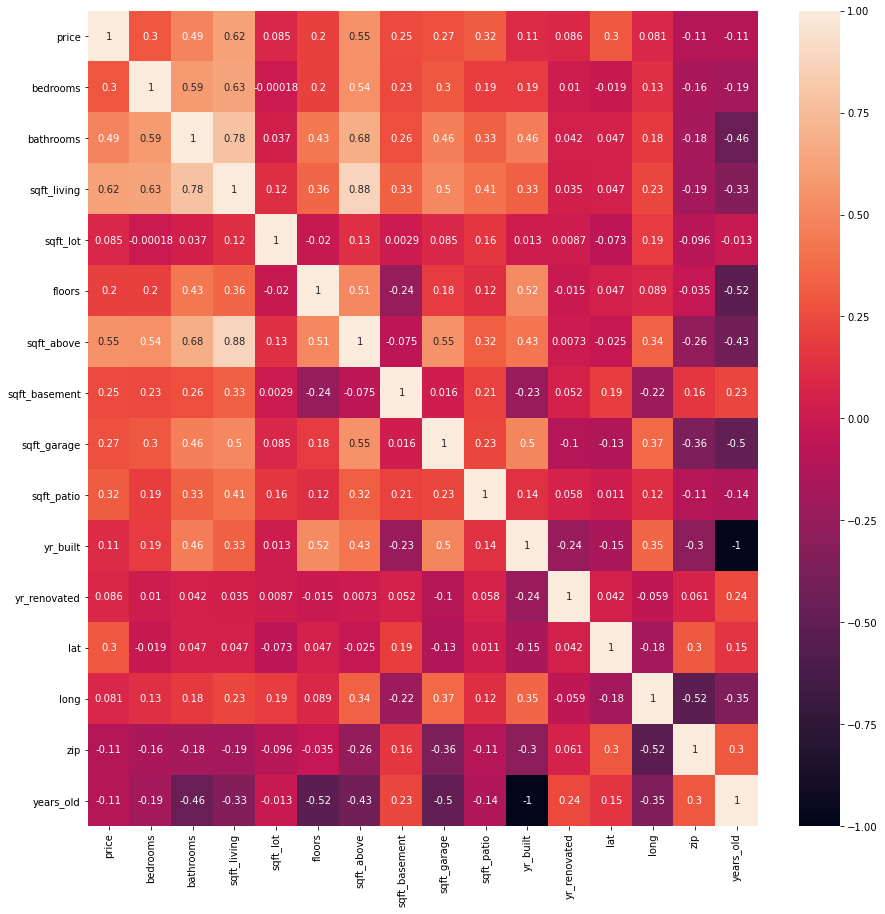

In [13]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [14]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.620117
sqft_above       0.549083
bathrooms        0.491485
sqft_patio       0.318593
lat              0.298873
bedrooms         0.295277
sqft_garage      0.269111
sqft_basement    0.247288
floors           0.201767
yr_built         0.107067
years_old        0.107067
zip              0.106358
yr_renovated     0.085973
sqft_lot         0.084831
long             0.081021
Name: price, dtype: float64

## Simple Linear Regression - Baseline Model with Train-Test Split

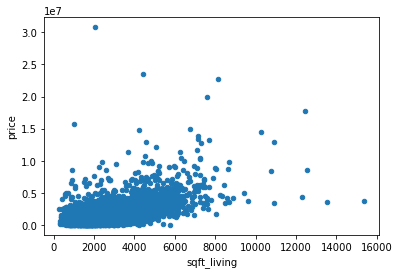

In [59]:
hd.plot.scatter(x = 'sqft_living', y = 'price');

In [15]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21873 rows and 25 columns
y_train is a Series with 21873 values


In [16]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Do the same for X Test
baseline_X_test = X_test[['sqft_living']]

# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(baseline_X_train, y_train)

# Get our R2 score
print('Base Training R2:', round(baseline_model.score(baseline_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(baseline_X_test, y_test), 4))
print()

# set up a validation model 
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=baseline_X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("Baseline Model Train score:", round(baseline_scores["train_score"].mean(), 4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(), 4))
print()

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(baseline_X_train)
test_preds = baseline_model.predict(baseline_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.4058
Base Test R2: 0.3252

Validation Checks
Baseline Model Train score: 0.398
Baseline Model Validation score: 0.4306

Train Root Mean Squared Error: 681623.3182668397
Test Root Mean Squared Error: 753813.4186429505
Difference in RMSE for Test/Train: 72190.1


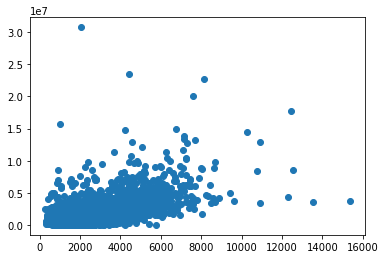

In [17]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Polynomial Model

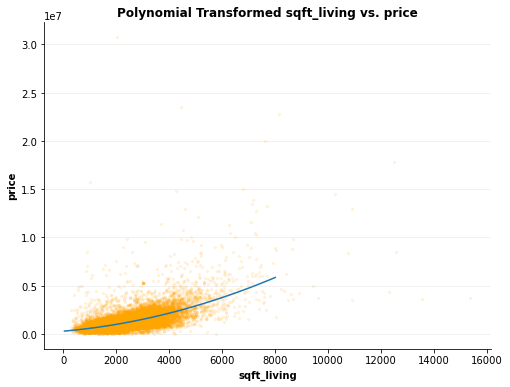

In [18]:
# fit and transform the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(baseline_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(hd['sqft_living'], hd['price'], 
            s = 5, alpha = 0.1, 
            color='orange')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show();

In [19]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)

print('Polynomial Base Training R2:', round(poly_baseline_model.score(X_poly, y_train), 4))

Polynomial Base Training R2: 0.4314


## Add School Data

In [20]:
#Import school data
new_school = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/Nadya/data/New School Data - Sheet1.csv")

#Clean up school data
schoolnames = new_school.loc[new_school["Name"].str.contains("miles")]
schoolnames["id"]=range(1, len(schoolnames) + 1)
schoolloc = new_school.loc[new_school["Name"].str.contains("WA")]
schoolloc["id"]=range(1, len(schoolloc) + 1)
schoolloc=schoolloc.rename(columns={"Name": "Location"})
students = new_school.loc[new_school["Name"].str.contains("Students")]
students["id"]=range(1, len(students) + 1)
students=students.rename(columns={"Name": "student count"})

#Relabel grades for schools
grade = new_school.loc[new_school["Name"].str.contains("Grade")]
grade["id"]=range(1, len(grade) + 1)
grade=grade.rename(columns={"Name": "grades"})
grade.grades = grade.grades.apply(lambda x: "middle" if "Middle" in x else x)
grade.grades = grade.grades.apply(lambda x: "elementary" if "Primary" in x else x)
grade.grades = grade.grades.apply(lambda x: "high" if "High" in x else x)
grade.grades = grade.grades.apply(lambda x: "kindergarten" if "Kindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "prek" if "Prekindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "special education" if "Special" in x else x)
grade.grades = grade.grades.apply(lambda x: "middle" if "Regular School Grade: Grade 6 to Grade 8" in x else x)
grade.grades = grade.grades.apply(lambda x: "other" if "Other" in x else x)

#concat dataframes
waschools = pd.concat([schoolnames.set_index('id'),schoolloc.set_index('id'), grade.set_index('id'), students.set_index('id')], axis=1, join='inner')

<ipython-input-20-145d94092efa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolnames["id"]=range(1, len(schoolnames) + 1)
<ipython-input-20-145d94092efa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolloc["id"]=range(1, len(schoolloc) + 1)
<ipython-input-20-145d94092efa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [21]:
#Create zipcode and student population columns
waschools["zip"] = waschools["Location"].str[-6:]
waschools[["student count", "count"]] = waschools["student count"].str.split(":", expand=True)
waschools=waschools.drop(columns=["student count", "Location"])

#Relabel performance column with ordinal values
waschools["performance"] = 0
waschools["performance"].iloc[0:111] = 5
waschools["performance"].iloc[112:214] = 4
waschools["performance"].iloc[214:287] = 3
waschools["performance"].iloc[287:337] = 2
waschools["performance"].iloc[337:395] = 1

#Make new dataframe for all schools ranked at 1 or more for performance
newwaschools = waschools.loc[waschools["performance"]!=0]

#Make new dataframe that shows average performance rating by zipcode
schoolavg = newwaschools.groupby("zip").mean("performance").reset_index().sort_values(by="performance", ascending = False)
schoolavg["zip"]=schoolavg["zip"].astype(int)


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
prices = hd[["price", "zip"]].groupby(by=["zip"]).mean().sort_values(by="price", ascending=False).reset_index()
prices["zip"]=prices["zip"].astype(int)

In [23]:
schools_and_prices = pd.merge(prices, schoolavg, on = ["zip"]).sort_values(by=["performance"], ascending=False)

In [24]:
schools_and_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 62
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zip          72 non-null     int64  
 1   price        72 non-null     float64
 2   performance  72 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.2 KB


In [25]:
schools_dict = dict(zip(schools_and_prices.zip, round(schools_and_prices.performance, 2)))
schools_dict

{98039: 5.0,
 98074: 5.0,
 98105: 5.0,
 98024: 5.0,
 98029: 5.0,
 98102: 5.0,
 98004: 5.0,
 98075: 5.0,
 98040: 5.0,
 98072: 4.8,
 98077: 4.8,
 98053: 4.75,
 98065: 4.75,
 98006: 4.75,
 98115: 4.71,
 98070: 4.67,
 98112: 4.67,
 98199: 4.5,
 98119: 4.5,
 98052: 4.5,
 98109: 4.5,
 98177: 4.5,
 98038: 4.5,
 98028: 4.4,
 98027: 4.4,
 98045: 4.33,
 98117: 4.33,
 98019: 4.33,
 98011: 4.33,
 98033: 4.25,
 98008: 4.12,
 98014: 4.0,
 98010: 4.0,
 98155: 4.0,
 98059: 4.0,
 98034: 4.0,
 98107: 4.0,
 98005: 4.0,
 98116: 3.8,
 98103: 3.75,
 98133: 3.71,
 98007: 3.5,
 98092: 3.3,
 98022: 3.29,
 98001: 3.22,
 98042: 3.14,
 98058: 3.1,
 98056: 3.0,
 98003: 3.0,
 98047: 3.0,
 98023: 2.92,
 98144: 2.83,
 98108: 2.57,
 98125: 2.5,
 98002: 2.33,
 98198: 2.29,
 98031: 2.27,
 98166: 2.25,
 98106: 2.0,
 98136: 2.0,
 98354: 2.0,
 98148: 2.0,
 98030: 1.86,
 98032: 1.8,
 98122: 1.75,
 98055: 1.67,
 98146: 1.5,
 98118: 1.5,
 98178: 1.25,
 98168: 1.22,
 98126: 1.2,
 98188: 1.0}

In [26]:
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

<ipython-input-26-a4b485f5a02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)


In [27]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,years_old,avg_school_quality
24120,8/26/2021,3,2.0,1010,7598,1.0,NO,NO,NO,NONE,...,0,0,1947,0,"5965 21st Avenue Southwest, Seattle, Washingto...",47.548270,-122.360050,98106,76,2.00
8411,3/10/2022,3,2.5,1300,825,2.0,NO,NO,NO,NONE,...,0,0,2008,0,"1127A 18th Ave, Seattle, Washington 98122, Uni...",47.611760,-122.309000,98122,15,1.75
20885,6/24/2021,3,2.0,1950,7070,1.0,NO,NO,NO,NONE,...,400,170,1976,0,"12534 Southeast 277th Place, Kent, Washington ...",47.353255,-122.174140,98030,47,1.86
11917,4/27/2022,3,2.0,1770,7544,1.0,NO,NO,NO,NONE,...,400,80,1977,0,"8902 Northeast 144th Street, Kirkland, Washing...",47.731640,-122.221600,98034,46,4.00
12517,1/3/2022,5,3.5,2690,7200,2.0,NO,NO,NO,GOOD,...,510,400,1978,0,"14508 37th Avenue Northeast, Lake Forest Park,...",47.734060,-122.288075,98155,45,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,4/20/2022,3,1.5,1400,8863,1.0,NO,NO,NO,NONE,...,0,60,1990,0,"313 Johnson Street, Enumclaw, Washington 98022...",47.194440,-121.999240,98022,33,3.29
5554,5/18/2022,4,2.5,2170,6408,1.0,NO,NO,NO,NONE,...,490,170,1981,0,"14008 81st Avenue Northeast, Kirkland, Washing...",47.726310,-122.233155,98034,42,4.00
883,4/25/2022,3,2.5,1740,4277,2.0,NO,NO,NO,NONE,...,440,20,1992,0,"25760 Southeast 35th Place, Sammamish, Washing...",47.577610,-121.995820,98029,31,5.00
16321,7/23/2021,4,3.0,2120,9046,1.0,NO,NO,NO,NONE,...,530,0,1993,0,"1917 South 369th Street, Federal Way, Washingt...",47.270015,-122.309395,98003,30,3.00


In [28]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

<ipython-input-28-7dad008bcee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["view"] = X_train["view"].replace(scale_mapper1)
<ipython-input-28-7dad008bcee4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["condition"] = X_train["condition"].replace(scale_mapper2)
<ipython-input-28-7dad008bcee4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [29]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance'], drop_first = True)

In [30]:
X_train = X_train.drop(columns=["heat_source", "sewer_system", "address", "lat", "long"])

In [31]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21873 entries, 24120 to 24470
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                21873 non-null  object 
 1   bedrooms            21873 non-null  float64
 2   bathrooms           21873 non-null  float64
 3   sqft_living         21873 non-null  float64
 4   sqft_lot            21873 non-null  float64
 5   floors              21873 non-null  float64
 6   view                21873 non-null  float64
 7   condition           21873 non-null  float64
 8   grade               21873 non-null  float64
 9   sqft_above          21873 non-null  float64
 10  sqft_basement       21873 non-null  float64
 11  sqft_garage         21873 non-null  float64
 12  sqft_patio          21873 non-null  float64
 13  yr_built            21873 non-null  float64
 14  yr_renovated        21873 non-null  float64
 15  zip                 21873 non-null  float64
 16  

# All Variable Model

In [32]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date"])

In [33]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     1345.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:30:52   Log-Likelihood:            -3.2176e+05
No. Observations:               21873   AIC:                         6.436e+05
Df Residuals:                   21852   BIC:                         6.437e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.67e+06    1.7e+05    -21.526      0.000      -4e+06   -3.34e+06
bedrooms           -8.778e+04   5675.407    -15.466      0.000   -9.89e+04   -7.67e+04
bathrooms            9.18e+04   8314.599     11.041      0.000    7.55e+04    1.08e+05
sqft_living          154.3999     18.801      8.212      0.000     117.549     191.251
sqft_lot              -0.1541      0.068     -2.278      0.023      -0.287      -0.021
floors              -1.03e+05   1.06e+04     -9.733      0.000   -1.24e+05   -8.22e+04
view                8.258e+04   5590.819     14.771      0.000    7.16e+04    9.35e+04
condition            2.75e+04   6377.543      4.312      0.000     1.5e+04       4e+04
grade               2.197e+05   6091.145     36.070      0.000    2.08e+05    2.32e+05
sqft_above           255.3412     19.050     13.404      0.000     218.003     292.680
sqft_basement        124.9974     14.052      8.895      0.000      97.455     152.540
sqft_garage         -213.9180     20.172    -10.605      0.000    -253.457    -174.379
sqft_patio            80.9586     18.758      4.316      0.000      44.192     117.725
yr_built           -1.075e+04   4319.255     -2.490      0.013   -1.92e+04   -2288.357
yr_renovated          24.9257     10.279      2.425      0.015       4.778      45.073
zip                  239.4620     88.850      2.695      0.007      65.311     413.614
years_old          -7099.1784   4366.301     -1.626      0.104   -1.57e+04    1459.089
avg_school_quality  1.483e+05   3979.859     37.253      0.000     1.4e+05    1.56e+05
waterfront_YES      8.635e+05   3.41e+04     25.350      0.000    7.97e+05     9.3e+05
greenbelt_YES      -8176.8348   2.56e+04     -0.319      0.750   -5.84e+04     4.2e+04
nuisance_YES        3.329e+04   1.09e+04      3.062      0.002     1.2e+04    5.46e+04
==============================================================================
Omnibus:                    28090.239   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16677623.839
Skew:                           6.674   Prob(JB):                         0.00
Kurtosis:                     137.615   Cond. No.                     4.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#add requirements for our stakeholder
hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
hd = hd.loc[hd["price"]<=1300000]
hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [34]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [35]:
select.fit(X = all_variable_X, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [36]:
select.ranking_

array([ 7,  1,  9, 16,  1,  2,  8,  1, 12, 13, 11, 14,  6, 15, 10,  5,  3,
        1,  1,  4])

In [37]:
all_variable_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'zip', 'years_old',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES'],
      dtype='object')

In [38]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

,0
bedrooms,7
bathrooms,1
sqft_living,9
sqft_lot,16
floors,1
view,2
condition,8
grade,1
sqft_above,12
sqft_basement,13


In [39]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'grade', 'avg_school_quality', 'greenbelt_YES', 'waterfront_YES']]
all_variable_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     3038.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:30:53   Log-Likelihood:            -3.2390e+05
No. Observations:               21873   AIC:                         6.478e+05
Df Residuals:                   21866   BIC:                         6.479e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.326e+06   3.11e+04    -74.773      0.000   -2.39e+06   -2.27e+06
bathrooms           2.016e+05   6699.326     30.100      0.000    1.89e+05    2.15e+05
floors             -2.206e+05   9323.224    -23.657      0.000   -2.39e+05   -2.02e+05
grade                3.58e+05   5295.474     67.600      0.000    3.48e+05    3.68e+05
avg_school_quality  1.587e+05   4146.478     38.266      0.000    1.51e+05    1.67e+05
greenbelt_YES      -3.788e+05   2.23e+04    -16.957      0.000   -4.23e+05   -3.35e+05
waterfront_YES      8.316e+05   2.32e+04     35.783      0.000    7.86e+05    8.77e+05
==============================================================================
Omnibus:                    27736.848   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12915198.110
Skew:                           6.605   Prob(JB):                         0.00
Kurtosis:                     121.307   Cond. No.                         65.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

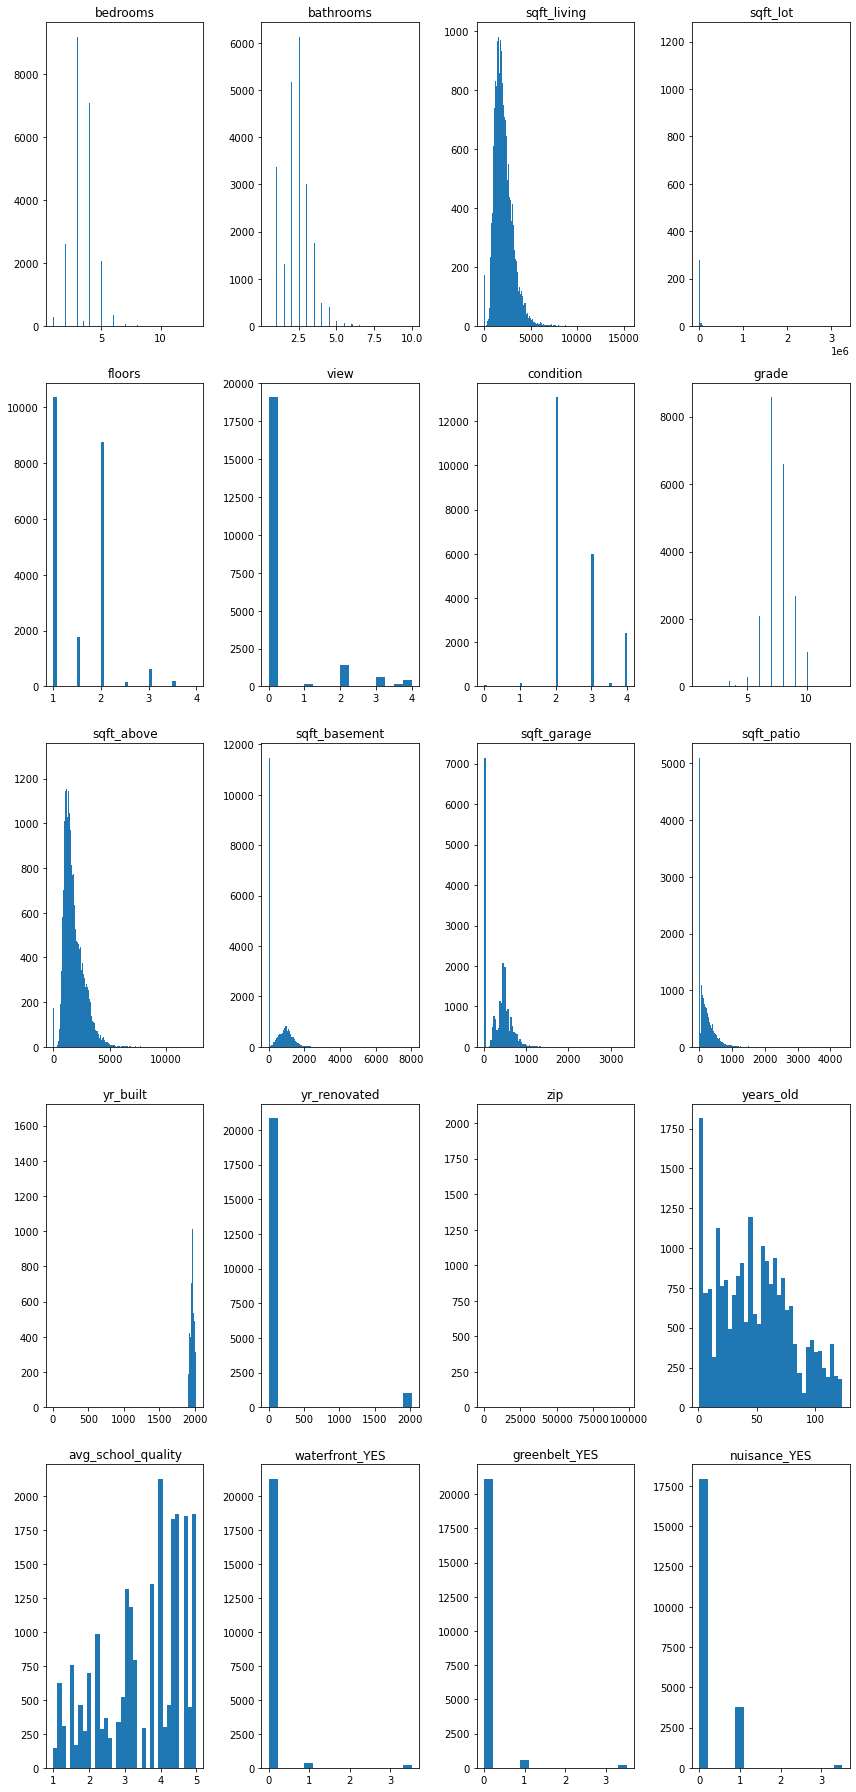

In [40]:
# set up figure for predictor variables in all_variable_X
fig, axes = plt.subplots(nrows=(all_variable_X.shape[1] // 4), ncols=4, figsize=(12,25))

# for each col in X_third, plot distribution
for col, ax in zip(all_variable_X, axes.flatten()):
    ax.hist(all_variable_X[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [41]:
#selecting variables for log
log_variables = ['sqft_living','sqft_above', 'years_old']

# assign to X_cont
X_logs = all_variable_X[log_variables]

In [42]:
X_logs

,sqft_living,sqft_above,years_old
24120,1010.0,1010.0,76.0
8411,1300.0,880.0,15.0
20885,1950.0,1080.0,47.0
11917,1770.0,1290.0,46.0
12517,2690.0,1720.0,45.0
...,...,...,...
22319,1400.0,1400.0,33.0
5554,2170.0,1440.0,42.0
883,1740.0,1740.0,31.0
16321,2120.0,1510.0,30.0


In [43]:
X_logs.describe()

,sqft_living,sqft_above,years_old
count,21873.000000,21873.000000,21873.000000
mean,2117.081663,1816.097436,48.876981
std,993.447953,895.759712,31.828292
min,3.527260,3.527260,1.000000
25%,1430.000000,1190.000000,21.000000
50%,1940.000000,1570.000000,47.000000
75%,2630.000000,2290.000000,71.000000
max,15360.000000,12660.000000,123.000000


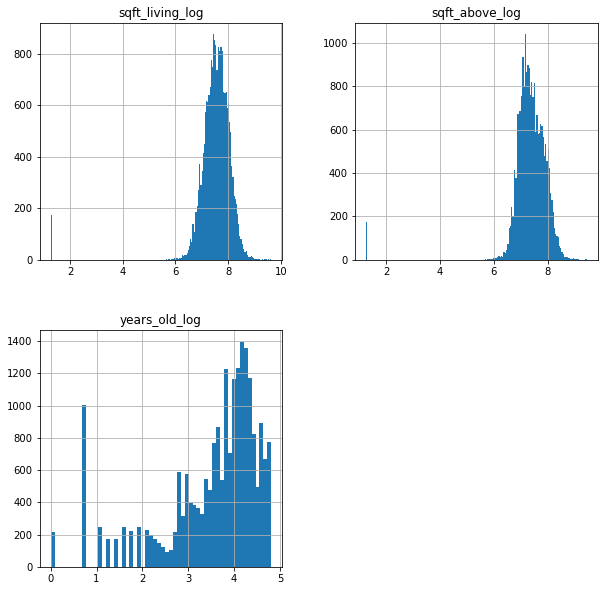

In [44]:
#log transformation
log_columns = [f'{column}_log' for column in X_logs.columns]
cont_log = np.log(X_logs)
cont_log.columns = log_columns
cont_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [45]:
cont_log

,sqft_living_log,sqft_above_log,years_old_log
24120,6.917706,6.917706,4.330733
8411,7.170120,6.779922,2.708050
20885,7.575585,6.984716,3.850148
11917,7.478735,7.162397,3.828641
12517,7.897296,7.450080,3.806662
...,...,...,...
22319,7.244228,7.244228,3.496508
5554,7.682482,7.272398,3.737670
883,7.461640,7.461640,3.433987
16321,7.659171,7.319865,3.401197


In [46]:
log_transformed = cont_log.join(all_variable_X).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 'years_old',
                                                                "yr_renovated", "yr_built", "sqft_basement", 
                                                                "sqft_garage", "sqft_patio"])
log_transformed

,sqft_living_log,sqft_above_log,years_old_log,bedrooms,bathrooms,floors,view,condition,grade,zip,avg_school_quality,waterfront_YES,greenbelt_YES,nuisance_YES
24120,6.917706,6.917706,4.330733,3.0,2.0,1.0,0.0,4.0,6.0,98106.0,2.00,0.0,0.0,0.0
8411,7.170120,6.779922,2.708050,3.0,2.5,2.0,0.0,2.0,8.0,98122.0,1.75,0.0,0.0,0.0
20885,7.575585,6.984716,3.850148,3.0,2.0,1.0,0.0,3.0,7.0,98030.0,1.86,0.0,0.0,0.0
11917,7.478735,7.162397,3.828641,3.0,2.0,1.0,0.0,2.0,8.0,98034.0,4.00,0.0,0.0,0.0
12517,7.897296,7.450080,3.806662,5.0,3.5,2.0,3.0,2.0,9.0,98155.0,4.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,7.244228,7.244228,3.496508,3.0,1.5,1.0,0.0,3.0,6.0,98022.0,3.29,0.0,0.0,0.0
5554,7.682482,7.272398,3.737670,4.0,2.5,1.0,0.0,2.0,8.0,98034.0,4.00,0.0,0.0,0.0
883,7.461640,7.461640,3.433987,3.0,2.5,2.0,0.0,3.0,8.0,98029.0,5.00,0.0,0.0,0.0
16321,7.659171,7.319865,3.401197,4.0,3.0,1.0,0.0,2.0,8.0,98003.0,3.00,0.0,0.0,0.0


In [47]:
log_y = np.log(y_train)

In [48]:
log_model = sm.OLS(log_y, sm.add_constant(log_transformed)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1956.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:31:19   Log-Likelihood:                -10332.
No. Observations:               21873   AIC:                         2.069e+04
Df Residuals:                   21858   BIC:                         2.081e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.1804      0.107     94.853      0.000       9.970      10.391
sqft_living_log        0.3310      0.017     19.845      0.000       0.298       0.364
sqft_above_log        -0.0803      0.014     -5.767      0.000      -0.108      -0.053
years_old_log          0.0669      0.003     19.946      0.000       0.060       0.073
bedrooms              -0.0057      0.004     -1.455      0.146      -0.013       0.002
bathrooms              0.0675      0.005     13.021      0.000       0.057       0.078
floors                 0.0329      0.007      4.837      0.000       0.020       0.046
view                   0.0712      0.004     19.935      0.000       0.064       0.078
condition              0.0314      0.004      7.804      0.000       0.024       0.039
grade                  0.1717      0.004     45.399      0.000       0.164       0.179
zip                -7.483e-06   1.34e-06     -5.581      0.000   -1.01e-05   -4.85e-06
avg_school_quality     0.1526      0.002     61.325      0.000       0.148       0.157
waterfront_YES         0.2029      0.022      9.139      0.000       0.159       0.246
greenbelt_YES          0.0418      0.017      2.499      0.012       0.009       0.075
nuisance_YES           0.0277      0.007      3.916      0.000       0.014       0.042
==============================================================================
Omnibus:                     6647.401   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89097.925
Skew:                          -1.084   Prob(JB):                         0.00
Kurtosis:                      12.647   Cond. No.                     4.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## One Hot Encode Zip Codes

In [49]:
log_transformed_zips = pd.get_dummies(log_transformed, columns = ['zip'], drop_first = True)
log_transformed_zips.columns

Index(['sqft_living_log', 'sqft_above_log', 'years_old_log', 'bedrooms',
       'bathrooms', 'floors', 'view', 'condition', 'grade',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'zip_98001.0', 'zip_98002.0', 'zip_98003.0', 'zip_98004.0',
       'zip_98005.0', 'zip_98006.0', 'zip_98007.0', 'zip_98008.0',
       'zip_98010.0', 'zip_98011.0', 'zip_98014.0', 'zip_98019.0',
       'zip_98022.0', 'zip_98023.0', 'zip_98024.0', 'zip_98027.0',
       'zip_98028.0', 'zip_98029.0', 'zip_98030.0', 'zip_98031.0',
       'zip_98032.0', 'zip_98033.0', 'zip_98034.0', 'zip_98038.0',
       'zip_98039.0', 'zip_98040.0', 'zip_98042.0', 'zip_98045.0',
       'zip_98047.0', 'zip_98052.0', 'zip_98053.0', 'zip_98055.0',
       'zip_98056.0', 'zip_98058.0', 'zip_98059.0', 'zip_98065.0',
       'zip_98070.0', 'zip_98072.0', 'zip_98074.0', 'zip_98075.0',
       'zip_98077.0', 'zip_98092.0', 'zip_98102.0', 'zip_98103.0',
       'zip_98105.0', 'zip_98106.0', 'zip_98107.0'

In [50]:
log_zips_model = sm.OLS(log_y, sm.add_constant(log_transformed_zips)).fit()
log_zips_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     627.1
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:31:20   Log-Likelihood:                -5775.1
No. Observations:               21873   AIC:                         1.172e+04
Df Residuals:                   21788   BIC:                         1.240e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.3926      0.082    114.894      0.000       9.232       9.553
sqft_living_log        0.2320      0.014     16.842      0.000       0.205       0.259
sqft_above_log         0.2484      0.013     19.575      0.000       0.224       0.273
years_old_log         -0.0035      0.003     -1.167      0.243      -0.009       0.002
bedrooms              -0.0071      0.003     -2.235      0.025      -0.013      -0.001
bathrooms              0.0430      0.004     10.105      0.000       0.035       0.051
floors                -0.0728      0.006    -11.709      0.000      -0.085      -0.061
view                   0.0672      0.003     22.367      0.000       0.061       0.073
condition              0.0577      0.003     17.304      0.000       0.051       0.064
grade                  0.0900      0.003     27.342      0.000       0.084       0.096
avg_school_quality     0.4674      0.003    145.251      0.000       0.461       0.474
waterfront_YES         0.3011      0.018     16.377      0.000       0.265       0.337
greenbelt_YES          0.0566      0.014      4.041      0.000       0.029       0.084
nuisance_YES          -0.0414      0.006     -7.051      0.000      -0.053      -0.030
zip_98001.0           -1.9968      0.110    -18.077      0.000      -2.213      -1.780
zip_98002.0           -1.6535      0.110    -15.080      0.000      -1.868      -1.439
zip_98003.0           -1.9417      0.110    -17.585      0.000      -2.158      -1.725
zip_98004.0           -1.5616      0.113    -13.782      0.000      -1.784      -1.340
zip_98005.0           -1.4382      0.114    -12.605      0.000      -1.662      -1.215
zip_98006.0           -1.9632      0.111    -17.611      0.000      -2.182      -1.745
zip_98007.0           -1.3973      0.113    -12.348      0.000      -1.619      -1.176
zip_98008.0           -1.6369      0.111    -14.703      0.000      -1.855      -1.419
zip_98010.0           -2.2493      0.112    -20.033      0.000      -2.469      -2.029
zip_98011.0           -1.9298      0.113    -17.028      0.000      -2.152      -1.708
zip_98014.0           -2.0193      0.114    -17.650      0.000      -2.244      -1.795
zip_98019.0           -2.1407      0.114    -18.860      0.000      -2.363      -1.918
zip_98022.0           -2.0048      0.111    -17.997      0.000      -2.223      -1.786
zip_98023.0           -1.8868      0.110    -17.197      0.000      -2.102      -1.672
zip_98024.0           -2.2824      0.116    -19.625      0.000      -2.510      -2.054
zip_98027.0           -1.9853      0.112    -17.794      0.000      -2.204      -1.767
zip_98028.0           -2.0647      0.113    -18.332      0.000      -2.285      -1.844
zip_98029.0           -2.1345      0.113    -18.887      0.000      -2.356      -1.913
zip_98030.0           -1.3481      0.1

In [51]:
zips_ohe = pd.get_dummies(log_transformed['zip'], drop_first = True)
zips_school = zips_ohe.mul(log_transformed_zips['avg_school_quality'], axis = 0)

In [52]:
zips_school_interaction = pd.merge(zips_school, 
                                   log_transformed_zips[['sqft_living_log', 'sqft_above_log',
                                                         'years_old_log', 'bathrooms',
                                                         'bedrooms', 'floors', 'view',
                                                         'condition', 'grade','waterfront_YES',
                                                         'greenbelt_YES', 'nuisance_YES']], 
                                   how = 'inner', left_on = zips_school.index, right_on = log_transformed_zips.index)
#zips_school_interaction
zips_school_interaction=zips_school_interaction.rename(columns={'key_0': 'index'})

# zips_school_interaction.rename(index={'key_0': 'index'})
zips_school_interaction.set_index('index', inplace = True)

In [53]:
zips_school_interaction

,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,...,years_old_log,bathrooms,bedrooms,floors,view,condition,grade,waterfront_YES,greenbelt_YES,nuisance_YES
index,,,,,,,,,,,,,,,,,,,,,
24120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.330733,2.0,3.0,1.0,0.0,4.0,6.0,0.0,0.0,0.0
8411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.708050,2.5,3.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0
20885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.850148,2.0,3.0,1.0,0.0,3.0,7.0,0.0,0.0,0.0
11917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.828641,2.0,3.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0
12517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.806662,3.5,5.0,2.0,3.0,2.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.496508,1.5,3.0,1.0,0.0,3.0,6.0,0.0,0.0,0.0
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.737670,2.5,4.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0
883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.433987,2.5,3.0,2.0,0.0,3.0,8.0,0.0,0.0,0.0


In [54]:
interaction_model = sm.OLS(log_y, sm.add_constant(zips_school_interaction)).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     627.1
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:31:20   Log-Likelihood:                -5775.1
No. Observations:               21873   AIC:                         1.172e+04
Df Residuals:                   21788   BIC:                         1.240e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.0412      0.089    124.367      0.000      10.867      11.215
98001.0            -0.6647      0.034    -19.313      0.000      -0.732      -0.597
98002.0            -0.9498      0.048    -19.928      0.000      -1.043      -0.856
98003.0            -0.7294      0.037    -19.706      0.000      -0.802      -0.657
98004.0            -0.1747      0.022     -7.824      0.000      -0.218      -0.131
98005.0            -0.3043      0.028    -10.717      0.000      -0.360      -0.249
98006.0            -0.2930      0.023    -12.647      0.000      -0.338      -0.248
98007.0            -0.4029      0.032    -12.457      0.000      -0.466      -0.339
98008.0            -0.3301      0.027    -12.292      0.000      -0.383      -0.277
98010.0            -0.5071      0.028    -18.154      0.000      -0.562      -0.452
98011.0            -0.3590      0.026    -13.832      0.000      -0.410      -0.308
98014.0            -0.4496      0.028    -15.793      0.000      -0.505      -0.394
98019.0            -0.4077      0.026    -15.684      0.000      -0.459      -0.357
98022.0            -0.6431      0.034    -18.945      0.000      -0.710      -0.577
98023.0            -0.7434      0.038    -19.657      0.000      -0.817      -0.669
98024.0            -0.3188      0.023    -13.894      0.000      -0.364      -0.274
98027.0            -0.3585      0.025    -14.267      0.000      -0.408      -0.309
98028.0            -0.3765      0.025    -14.846      0.000      -0.426      -0.327
98029.0            -0.2892      0.022    -12.993      0.000      -0.333      -0.246
98030.0            -1.1438      0.060    -19.078      0.000      -1.261      -1.026
98031.0            -0.9171      0.049    -18.790      0.000      -1.013      -0.821
98032.0            -1.1486      0.062    -18.415      0.000      -1.271      -1.026
98033.0            -0.2740      0.026    -10.491      0.000      -0.325      -0.223
98034.0            -0.3681      0.028    -13.354      0.000      -0.422      -0.314
98038.0            -0.4378      0.025    -17.841      0.000      -0.486      -0.390
98039.0            -0.1145      0.024     -4.806      0.000      -0.161      -0.068
98040.0            -0.2364      0.022    -10.623      0.000      -0.280      -0.193
98042.0            -0.6676      0.035    -18.977      0.000      -0.737      -0.599
98045.0            -0.4145      0.026    -16.166      0.000      -0.465      -0.364
98047.0            -0.7245      0.039    -18.640      0.000      -0.801      -0.648
98052.0            -0.2987      0.025    -12.148      0.000      -0.347      -0.250
98053.0            -0.3095      0.023    -13.207      0.000      -0.355      -0.264
98055.0            -1.1987      0.067    -17.819      0.000      -1.331      -1.067
98056.0            -0.5962      0.037    -16.214      0.000

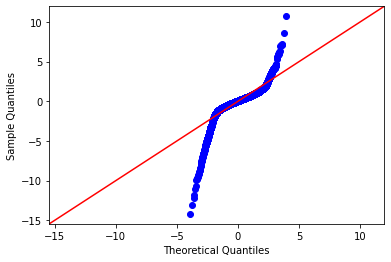

In [55]:
sm.graphics.qqplot(interaction_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

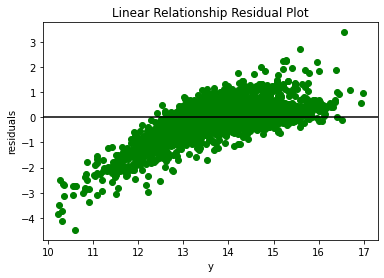

In [56]:
fig, ax = plt.subplots()

ax.scatter(log_y, interaction_model.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

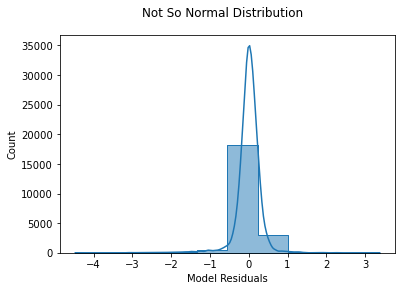

In [57]:
fig, ax = plt.subplots()
sns.histplot(interaction_model.resid, bins=10, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution");